In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the Data

In [2]:
# Original dataset and description can be found at the following link
# https://www.kaggle.com/datasets/datasf/sf-library-usage-data

In [3]:
# Read the data into a Pandas DataFrame
library_df = pd.read_csv('Library_Usage.csv')
library_df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [4]:
# Get a brief summary of the DataFrame
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      423448 non-null  object 
 8   Circulation Active Year       423448 non-null  object 
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [5]:
# Drop Supervisor District due to unneeded data
library_df = library_df.drop(columns='Supervisor District')

# Drop null values
library_df = library_df.dropna()

# Reset index
library_df = library_df.reset_index(drop = True)

In [6]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423193 entries, 0 to 423192
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Patron Type Code              423193 non-null  int64 
 1   Patron Type Definition        423193 non-null  object
 2   Total Checkouts               423193 non-null  int64 
 3   Total Renewals                423193 non-null  int64 
 4   Age Range                     423193 non-null  object
 5   Home Library Code             423193 non-null  object
 6   Home Library Definition       423193 non-null  object
 7   Circulation Active Month      423193 non-null  object
 8   Circulation Active Year       423193 non-null  object
 9   Notice Preference Code        423193 non-null  object
 10  Notice Preference Definition  423193 non-null  object
 11  Provided Email Address        423193 non-null  bool  
 12  Year Patron Registered        423193 non-null  int64 
 13 

In [7]:
library_df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False


# Reviewing/Cleaning Data

Review unique values in the dataset to identify possible errors

In [8]:
# Identify the number of unique values in each column
library_df.nunique()

Patron Type Code                  18
Patron Type Definition            18
Total Checkouts                 4274
Total Renewals                  2738
Age Range                         10
Home Library Code                 79
Home Library Definition           35
Circulation Active Month          13
Circulation Active Year           15
Notice Preference Code             4
Notice Preference Definition       4
Provided Email Address             2
Year Patron Registered            14
Outside of County                  2
dtype: int64

- Patron Type Code and Definition number of unique values match
- Notice Preference Code and Definition number of unique values match
- Home Library Code and Definition number of unique values __DO NOT__ match

In [9]:
# Determine reason for difference in unique count of library home code/definition

# Create a list of the names of the librarys
libs = list(library_df['Home Library Definition'].unique())

# Use a for loop to print the name of the library and the codes associated with it
for lib in libs:
    j = library_df.loc[library_df['Home Library Definition'] == lib]
    print(lib)
    print(j['Home Library Code'].unique())

Main Library
['X']
Mission Bay
['M8']
Potrero
['P7']
Sunset
['S7']
Merced
['M4']
Noe Valley/Sally Brunn
['N4']
Excelsior
['E9']
Chinatown
['C2']
Richmond
['R3']
North Beach
['N6']
Presidio
['P9']
Mission
['M6']
Park
['P1']
Marina
['M2']
Parkside
['P3']
Eureka Valley/Harvey Milk Memorial
['E7']
Anza
['A5']
West Portal
['W2']
Ingleside
['I5']
Bernal Heights
['B4']
Portola
['P5']
Ortega
['O7']
Western Addition
['W4']
Unknown
['YB' 'G4AAA' 'YB9' 'R3J' 'XFFL' 'S7J' 'B4AAA' 'YB7' 'YB8' 'B2AAA' 'O2AAA'
 'XFSAA' 'M8AAA' 'N6AAA' 'C2J' 'NONE' 'M6AAA' 'YJJAA' 'E9AAA' 'P1AAA'
 'YB6' 'W2AAA' 'B2AZZ' 'M4AAA' 'P3AAA' 'N4AAA' 'I7' 'P7J' 'M2AAA' 'YLWAA'
 'O7AAA' 'S7AAA' 'YBJ' 'M6ABU' 'P7AAA' 'R3AAA' 'YB5' 'P1J' 'YB10' 'M8J'
 'N6J' 'AQUIS' 'E7J' 'W2J' 'O7J']
Ocean View
['O2']
Glen Park
['G4']
Visitacion Valley
['V3']
Bayview/Linda Brooks-Burton
['B2']
Golden Gate Valley
['G6']
Library on Wheels
['YLW']
Children's Bookmobile
['YJJ']
Branch Bookmobile (Sunset)
['YB4']
Branch Bookmobile (West Portal)
['YB2

- The reason for the discrepency in the counts of the library code vs. description is due to __Unknown__ having 45 unique codes associated with it
- Unknown: 
['YB' 'G4AAA' 'YB9' 'R3J' 'XFFL' 'S7J' 'B4AAA' 'YB7' 'YB8' 'B2AAA' 'O2AAA'
 'XFSAA' 'M8AAA' 'N6AAA' 'C2J' 'NONE' 'M6AAA' 'YJJAA' 'E9AAA' 'P1AAA'
 'YB6' 'W2AAA' 'B2AZZ' 'M4AAA' 'P3AAA' 'N4AAA' 'I7' 'P7J' 'M2AAA' 'YLWAA'
 'O7AAA' 'S7AAA' 'YBJ' 'M6ABU' 'P7AAA' 'R3AAA' 'YB5' 'P1J' 'YB10' 'M8J'
 'N6J' 'AQUIS' 'E7J' 'W2J' 'O7J']

- All other library descriptions are associated with only one code

In [10]:
# Review circulation active month/year to determine why there are 13 months

month = library_df['Circulation Active Month'].unique()
print(f'The unique Circulation Active Month values are: {month}')

year = library_df['Circulation Active Year'].unique()
print(f'The unique Circulation Active Year values are: {year}')

The unique Circulation Active Month values are: ['November' 'October' 'January' 'February' 'July' 'December' 'September'
 'May' 'August' 'March' 'June' 'April' 'None']
The unique Circulation Active Year values are: ['2012' '2015' '2016' '2004' '2014' '2005' '2006' '2007' '2013' '2010'
 '2011' '2008' 'None' '2009' '2003']


In [11]:
# It should be noted that the library electronic system integration was completed in 2003
# Therefore the counts from that year may be incorrect due to the need to move all patrons into the system
library_df['Year Patron Registered'].value_counts()

2003    69239
2015    53885
2014    51842
2013    48205
2012    37393
2011    26529
2016    26254
2010    24318
2009    22307
2008    20511
2007    13276
2006    10775
2005     9666
2004     8993
Name: Year Patron Registered, dtype: int64

In [12]:
# Identify the given age ranges for future analysis
library_df['Age Range'].unique()

array(['65 to 74 years', '55 to 59 years', '60 to 64 years',
       '45 to 54 years', '35 to 44 years', '25 to 34 years',
       '20 to 24 years', '75 years and over', '0 to 9 years',
       '10 to 19 years'], dtype=object)

In [13]:
library_df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False


In [14]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423193 entries, 0 to 423192
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Patron Type Code              423193 non-null  int64 
 1   Patron Type Definition        423193 non-null  object
 2   Total Checkouts               423193 non-null  int64 
 3   Total Renewals                423193 non-null  int64 
 4   Age Range                     423193 non-null  object
 5   Home Library Code             423193 non-null  object
 6   Home Library Definition       423193 non-null  object
 7   Circulation Active Month      423193 non-null  object
 8   Circulation Active Year       423193 non-null  object
 9   Notice Preference Code        423193 non-null  object
 10  Notice Preference Definition  423193 non-null  object
 11  Provided Email Address        423193 non-null  bool  
 12  Year Patron Registered        423193 non-null  int64 
 13 

# Visualization of the Data

### Data Breakdown by Age Range

In [15]:
# total number of library patrons
library_df['Age Range'].count()


423193

#### Number of Patrons Per Age Range

In the 0 to 9 years age range there are 38242 library patrons.
In the 10 to 19 years age range there are 58935 library patrons.
In the 20 to 24 years age range there are 29751 library patrons.
In the 25 to 34 years age range there are 91074 library patrons.
In the 35 to 44 years age range there are 67389 library patrons.
In the 45 to 54 years age range there are 52487 library patrons.
In the 55 to 59 years age range there are 21229 library patrons.
In the 60 to 64 years age range there are 19798 library patrons.
In the 65 to 74 years age range there are 30138 library patrons.
In the 75 years and over age range there are 14150 library patrons.


Text(0.5, 1.0, 'Number of Library Patrons per Age Range Group')

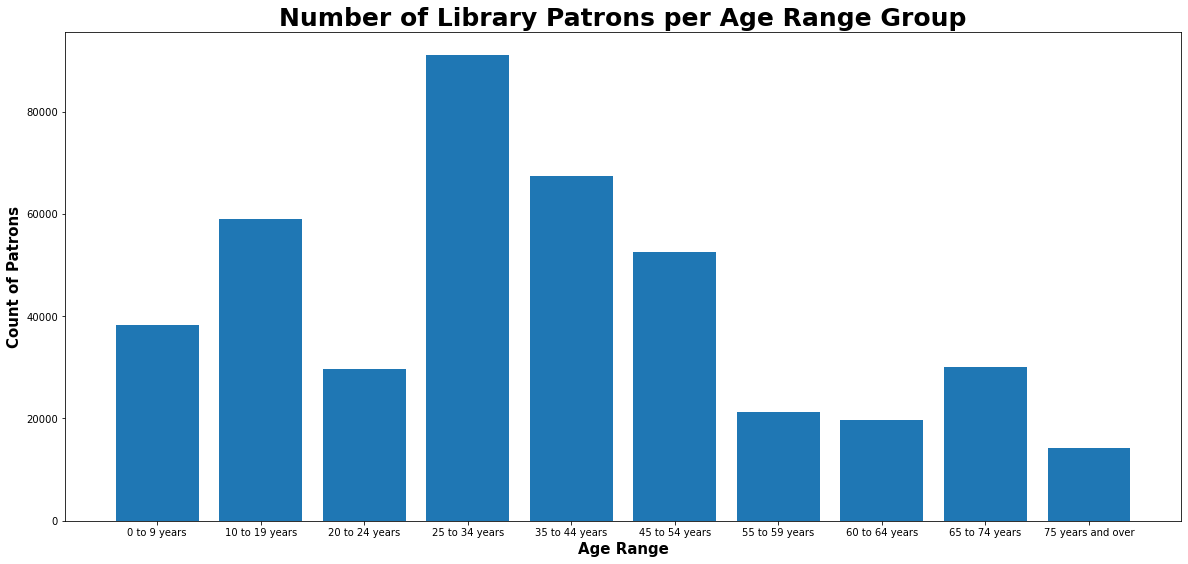

In [16]:
# determine the number of patrons per age range group

# create a list of the ranges
ranges = list(library_df['Age Range'].unique())
ranges.sort()

# create a list for the counts of each range
range_count = []

# use a for loop to loop through the list of ranges and count the number of records per group; print the range and number of patrons
for r in ranges:
    rc = library_df.loc[library_df['Age Range'] == r]
    count = rc['Age Range'].count()
    range_count.append(count)
    print(f'In the {r} age range there are {count} library patrons.')
    

# plot the ranges and count of patrons
plt.figure(figsize=(20, 9))
plt.bar(ranges,range_count, color ='tab:blue')
plt.xlabel('Age Range', fontweight ='bold', fontsize = 15)
plt.ylabel('Count of Patrons', fontweight ='bold', fontsize = 15)
plt.title('Number of Library Patrons per Age Range Group', fontweight = 'bold', fontsize = 25)

#### Average Number Checkouts Per Age Range

Text(0, 0.5, 'Total Checkouts')

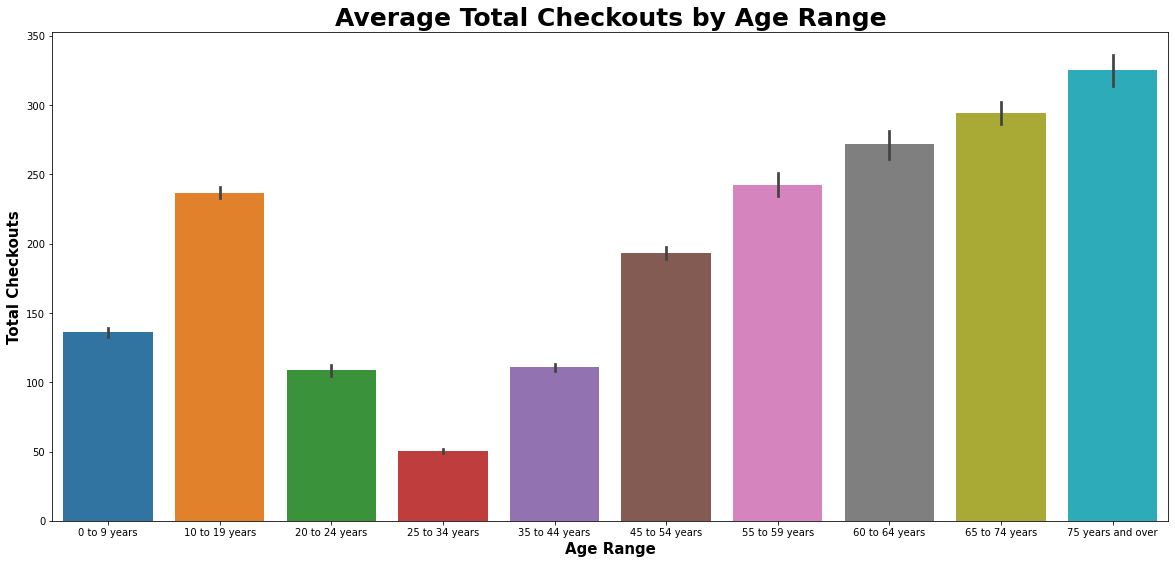

In [17]:
# visualize the average total checkouts per age range

# sort the Age Range column 
library_df = library_df.sort_values('Age Range')

# plot the data
plt.figure(figsize=(20, 9))
sns.barplot(x=library_df['Age Range'], y=library_df['Total Checkouts'])
plt.title("Average Total Checkouts by Age Range", fontweight = 'bold', fontsize = 25)
plt.xlabel('Age Range', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Checkouts', fontweight ='bold', fontsize = 15)

#### Percent of Patrons that Provided an Email Address Per Age Range

Text(0.5, 0, 'Age Range')

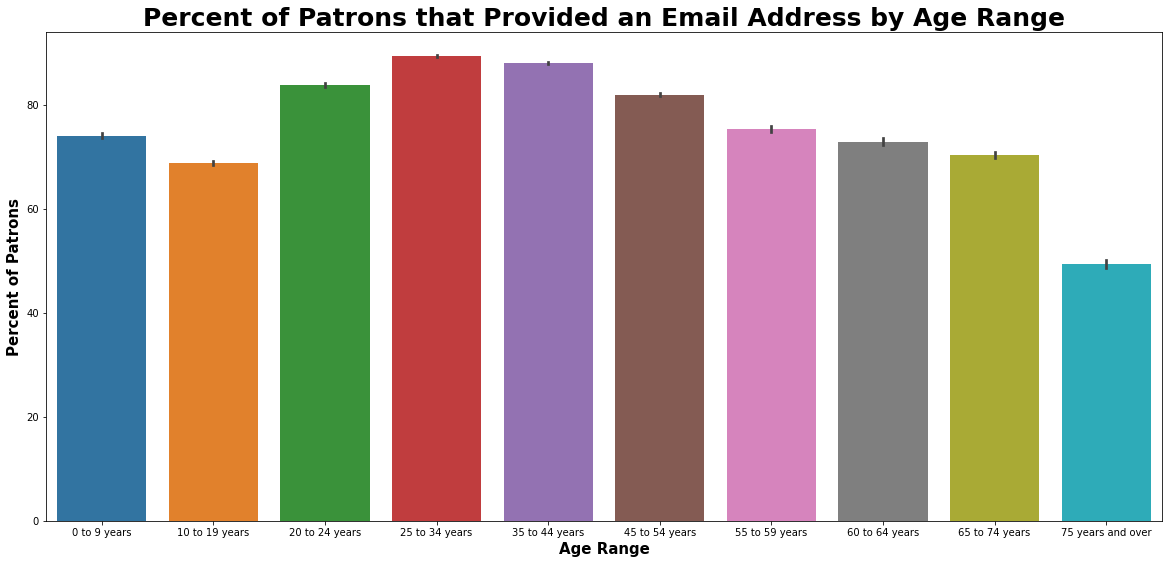

In [18]:
# visualize the percent of patrons that provided an email address by Age Range

# sort the Age Range column 
library_df = library_df.sort_values('Age Range')

# plot the data
plt.figure(figsize=(20, 9))
ax = sns.barplot(x=library_df['Age Range'], y=library_df['Provided Email Address'].mul(100))
plt.title("Percent of Patrons that Provided an Email Address by Age Range", fontweight = 'bold', fontsize = 25)
plt.ylabel('Percent of Patrons', fontweight ='bold', fontsize = 15)
plt.xlabel('Age Range', fontweight ='bold', fontsize = 15)



#### Number of Patrons Per Active Year Per Age Range

In [19]:
# create a new dataframe with only the daat needed
year_age_df = library_df.drop(columns=['Patron Type Code', 'Patron Type Definition', 'Total Checkouts', 'Total Renewals', 'Home Library Code', 'Home Library Definition', 'Circulation Active Month', 'Notice Preference Code', 'Notice Preference Definition', 'Provided Email Address', 'Year Patron Registered', 'Outside of County'])

# drop rows that don't have a year provided
year_age_df = year_age_df.drop(year_age_df[year_age_df['Circulation Active Year'] == 'None'].index, inplace=False)

# reset the index
year_age_df = year_age_df.reset_index(drop=True)

# change the Year column type to an integer
year_age_df['Circulation Active Year'] = year_age_df['Circulation Active Year'].astype(int)

In [20]:
# use value_counts to count the number for each unique Age Range/Year pair
year_age_count_df = year_age_df.value_counts().reset_index()
year_age_count_df = year_age_count_df.rename(columns={0: "count"})

# sort the dataframe for analysis
year_age_count_df = year_age_count_df.sort_values(by = ['Age Range', 'Circulation Active Year'])

# review the new dataframe
year_age_count_df.head()

,Age Range,Circulation Active Year,count
129,0 to 9 years,2003,1
124,0 to 9 years,2004,2
126,0 to 9 years,2005,2
127,0 to 9 years,2006,2
134,0 to 9 years,2007,1


In [21]:
# drop 2003 because all age ranges are not represented
year_age_count_df = year_age_count_df.drop(year_age_count_df[year_age_count_df['Circulation Active Year'] == 2003].index, inplace=False)


In [22]:
# create a list of the age range categories
ranges = list(year_age_count_df['Age Range'].unique())

# create an empty list for the for loop counts
list_of_counts_per_age = []

# use a for loop to create a list of lists of the count per year based on the Age Range
for r in ranges:
    df = year_age_count_df.drop(year_age_count_df[year_age_count_df['Age Range'] != r].index, inplace = False)
    list_of_counts_per_age.append(list(df['count']))

# check that for loop ran correctly
print(len(list_of_counts_per_age))
list_of_counts_per_age

10


[[2, 2, 2, 1, 2, 10, 14, 22, 281, 1944, 3713, 6707, 21129],
 [2, 18, 12, 32, 99, 156, 206, 309, 956, 5684, 9081, 12486, 22785],
 [11, 17, 26, 34, 51, 94, 153, 194, 729, 3895, 5465, 6253, 7027],
 [41, 72, 97, 127, 220, 360, 563, 661, 2520, 11264, 15281, 17561, 23814],
 [62, 111, 131, 162, 277, 377, 579, 619, 1835, 7718, 10898, 12929, 20738],
 [63, 96, 100, 142, 215, 328, 566, 539, 1319, 5624, 7882, 9743, 18040],
 [32, 65, 56, 61, 95, 130, 267, 197, 562, 2035, 3014, 3611, 7675],
 [28, 40, 47, 60, 96, 123, 197, 214, 414, 1769, 2646, 3156, 7795],
 [34, 53, 65, 52, 113, 165, 298, 246, 635, 2433, 3605, 4725, 12823],
 [22, 24, 31, 39, 76, 77, 132, 107, 316, 1329, 1871, 2402, 6033]]

In [23]:
# break down the above created list to have a list of counts for each age range category
zero_nine = list_of_counts_per_age[0]
ten_nineteen = list_of_counts_per_age[1]
twenty_twentyfour = list_of_counts_per_age[2]
twentyfive_thirtyfour = list_of_counts_per_age[3]
thirtyfive_fourtyfour = list_of_counts_per_age[4]
fourtyfive_fiftyfour = list_of_counts_per_age[5]
fiftyfive_fiftynine = list_of_counts_per_age[6]
sixty_sixtyfour = list_of_counts_per_age[7]
sixtyfive_seventyfour = list_of_counts_per_age[8]
seventyfive = list_of_counts_per_age[9]

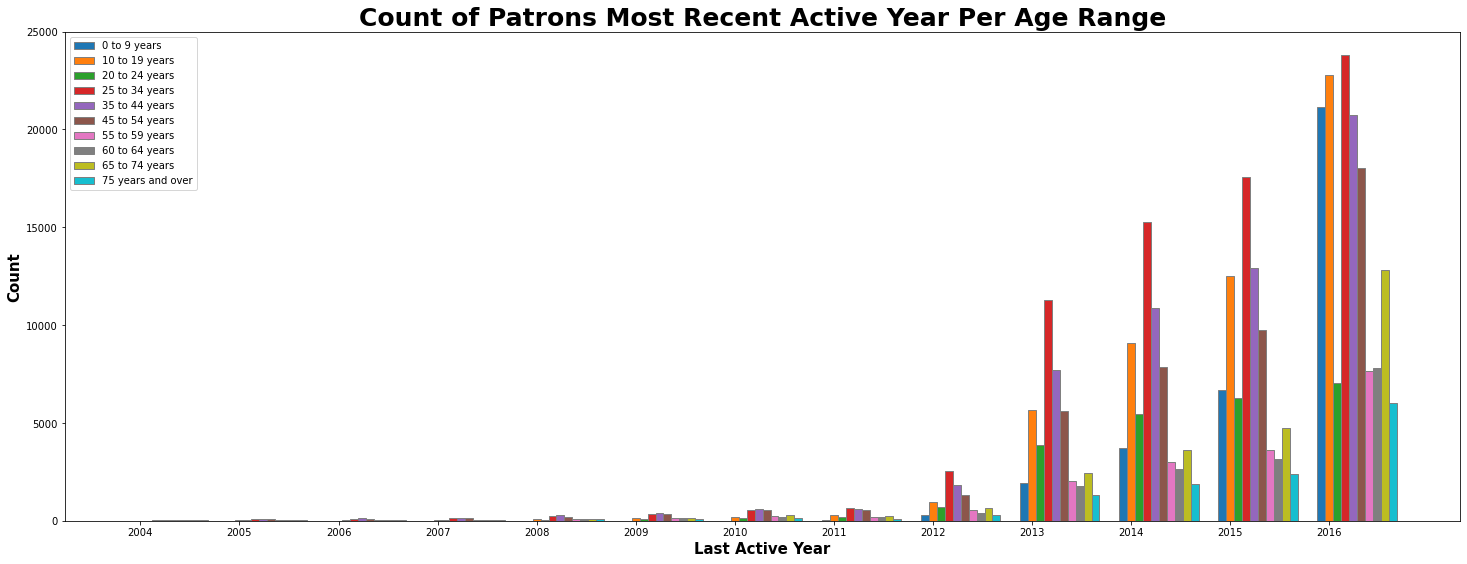

In [24]:
# create a bar plot to visualize the data

# set width of bar
barWidth = 0.08
fig = plt.subplots(figsize =(25, 9))

# Set position of bar on X axis
br1 = np.arange(len(zero_nine))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]

# Make the plot
plt.bar(br1, zero_nine, color ='tab:blue', width = barWidth, edgecolor ='grey', label ='0 to 9 years')
plt.bar(br2, ten_nineteen, color ='tab:orange', width = barWidth, edgecolor ='grey', label ='10 to 19 years')
plt.bar(br3, twenty_twentyfour, color ='tab:green', width = barWidth, edgecolor ='grey', label ='20 to 24 years')
plt.bar(br4, twentyfive_thirtyfour, color ='tab:red', width = barWidth, edgecolor ='grey', label = '25 to 34 years')
plt.bar(br5, thirtyfive_fourtyfour, color ='tab:purple', width = barWidth, edgecolor ='grey', label ='35 to 44 years')
plt.bar(br6, fourtyfive_fiftyfour, color ='tab:brown', width = barWidth, edgecolor ='grey', label ='45 to 54 years')
plt.bar(br7, fiftyfive_fiftynine, color ='tab:pink', width = barWidth, edgecolor ='grey', label ='55 to 59 years')
plt.bar(br8, sixty_sixtyfour, color ='tab:gray', width = barWidth, edgecolor ='grey', label ='60 to 64 years')
plt.bar(br9, sixtyfive_seventyfour, color ='tab:olive', width = barWidth, edgecolor ='grey', label ='65 to 74 years')
plt.bar(br10, seventyfive, color ='tab:cyan', width = barWidth, edgecolor ='grey', label ='75 years and over')


years = list(year_age_count_df['Circulation Active Year'].unique())
# Adding labels
plt.title('Count of Patrons Most Recent Active Year Per Age Range', fontweight = 'bold', fontsize = 25)
plt.xlabel('Last Active Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(zero_nine))],years)
 
plt.legend()
plt.show()

# Conculsions

- The largest number of patrons is in the 25 to 24 age range
    - This group has the lowest average number of checkouts
    - They also have the highest percentage of patrons that provided an email address
- In contrast, the lowest number of patrons is in the 75 years and over age range
    - This group has the highest average number of checkouts - which may be due to being long-term patrons of the library
    - They also have the lowest percentage of patrons that provided an email address
- A majority of the patrons across all age ranges have been active within the last 5 years of data
    - The highest numbers are in the most recent year